In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
from sklearn.impute import SimpleImputer

In [4]:
si = SimpleImputer(strategy='mean', missing_values=0)

In [5]:
impute_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[impute_features] = si.fit_transform(df[impute_features])

In [6]:
dataset = df.to_numpy()

In [7]:
dataset_x = dataset[:, :-1]
dataset_y = dataset[:, -1]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
training_dataset_x, test_dataset_x, training_dataset_y, test_dataset_y = train_test_split(dataset_x, dataset_y, test_size=0.2)

In [14]:
from tensorflow.keras.callbacks import Callback

In [12]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs):
        loss = logs['loss']
        val_loss = logs['val_loss']
        print(f'epoch: {epoch}, loss: {loss}, val_loss: {val_loss}')

In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense

In [11]:
model = Sequential(name='Diabetes')

In [12]:
model.add(Input((training_dataset_x.shape[1],)))
model.add(Dense(16, activation='relu', name='Hidden-1'))
model.add(Dense(16, activation='relu', name='Hidden-2'))
model.add(Dense(1, activation='sigmoid', name='Output'))
model.summary()

Model: "Diabetes"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-1 (Dense)                │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-2 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 433 (1.69 KB)

 Trainable params: 433 (1.69 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

In [17]:
mycallback = MyCallback()

In [ ]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=300, validation_split=0.2, callbacks=[mycallback], verbose=0)

In [24]:
def on_epoch_end_proc(epoch, logs):
    pass
def on_batch_begin_proc(batch, logs):
    pass
def on_batch_end_proc(batch, logs):
    pass

from tensorflow.keras.callbacks import LambdaCallback

lambda_callback = LambdaCallback(on_epoch_end=on_epoch_end_proc, on_batch_begin=on_batch_begin_proc, on_batch_end=on_batch_end_proc)
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=300, validation_split=0.2, callbacks=[lambda_callback], verbose=0)

In [16]:
class MyLambdaCallback(Callback):
    def __init__(self, on_epoch_begin=None, on_epoch_end=None, on_batch_begin=None,  on_batch_end=None):
        self._on_epoch_begin = on_epoch_begin
        self._on_epoch_end = on_epoch_end
        self._on_batch_begin = on_batch_begin
        self._on_batch_end = on_batch_end
        
    def on_epoch_begin(self, epoch, logs):
        if self._on_epoch_begin:
            self._on_epoch_begin(epoch, logs)
    
    def on_epoch_end(self, epoch, logs):
        if self._on_epoch_end:
            self._on_epoch_end(epoch, logs)
    
    def on_batch_begin(self, batch, logs):
        if self._on_batch_begin:
            self._on_batch_begin(batch, logs)
                
    def on_batch_end(self, batch, logs):
        if self._on_batch_end:
            self._on_batch_end(batch, logs)


In [17]:
import numpy as np

In [18]:
batch_losses= []

In [19]:
def on_epoch_begin_proc(epoch, logs):
    global batch_losses
    batch_losses = []
    print(f'eopch: {epoch}')    


def on_epoch_end_proc(epoch, logs):
    loss = logs['loss']
    val_loss = logs['val_loss']
    print(f'\nepoch: {epoch}, loss: {loss}, val_loss: {val_loss}')
    print(f'batch mean: {np.mean(batch_losses)}')
    print('-' * 30)
  
def on_batch_end_proc(batch, logs):
    global total
    loss = logs['loss']
    batch_losses.append(loss)
    print(f'\t\tbatch: {batch}, loss: {loss}')

In [20]:
mylambda_callback = MyLambdaCallback(on_epoch_begin=on_epoch_begin_proc, on_epoch_end=on_epoch_end_proc, on_batch_end=on_batch_end_proc)

In [21]:
hist = model.fit(training_dataset_x, training_dataset_y, batch_size=32, epochs=100, validation_split=0.2, callbacks=[mylambda_callback], verbose=0)

eopch: 0
		batch: 0, loss: 57.786251068115234
		batch: 1, loss: 52.35906982421875
		batch: 2, loss: 60.49020004272461
		batch: 3, loss: 63.2248649597168
		batch: 4, loss: 61.65366744995117
		batch: 5, loss: 58.71950149536133
		batch: 6, loss: 59.38372802734375
		batch: 7, loss: 57.86128234863281
		batch: 8, loss: 56.16404342651367
		batch: 9, loss: 56.010719299316406
		batch: 10, loss: 54.490028381347656
		batch: 11, loss: 53.2545166015625
		batch: 12, loss: 51.06521224975586
		batch: 13, loss: 49.58074951171875
		batch: 14, loss: 48.47043991088867
		batch: 15, loss: 47.92129898071289

epoch: 0, loss: 47.92129898071289, val_loss: 26.353471755981445
batch mean: 55.527223348617554
------------------------------
eopch: 1
		batch: 0, loss: 23.012941360473633
		batch: 1, loss: 21.421234130859375
		batch: 2, loss: 21.333282470703125
		batch: 3, loss: 18.879690170288086
		batch: 4, loss: 19.017826080322266
		batch: 5, loss: 18.99048614501953
		batch: 6, loss: 19.143856048583984
		batch: 7, lo

In [22]:
import matplotlib.pyplot as plt

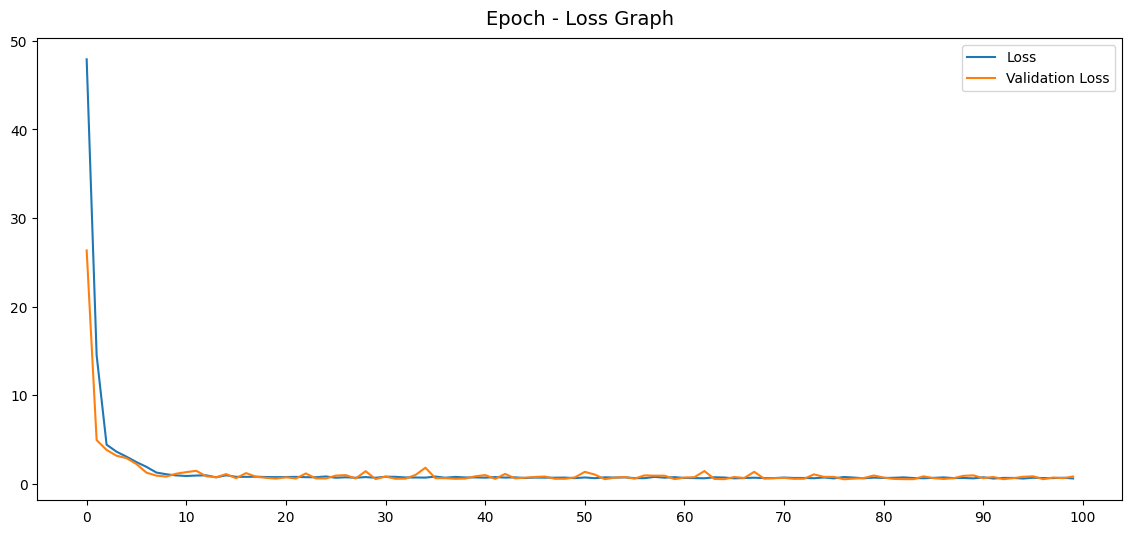

In [23]:
plt.figure(figsize=(14, 6))
plt.title('Epoch - Loss Graph', pad=10, fontsize=14)
plt.xticks(range(0, 300, 10))
plt.plot(hist.epoch, hist.history['loss'])
plt.plot(hist.epoch, hist.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

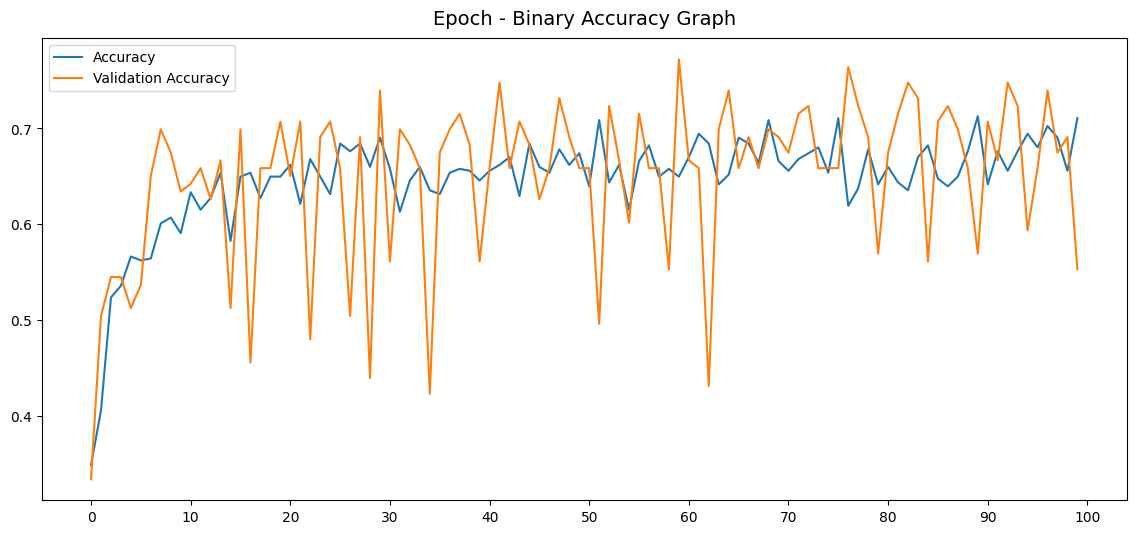

In [24]:
plt.figure(figsize=(14, 6))
plt.title('Epoch - Binary Accuracy Graph', pad=10, fontsize=14)
plt.xticks(range(0, 300, 10))
plt.plot(hist.epoch, hist.history['binary_accuracy'])
plt.plot(hist.epoch, hist.history['val_binary_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

In [26]:
eval_result = model.evaluate(test_dataset_x, test_dataset_y, batch_size=32)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - binary_accuracy: 0.5238 - loss: 0.9398 


In [27]:
for i in range(len(eval_result)):
    print(f'{model.metrics_names[i]}: {eval_result[i]}')

loss: 0.9009096026420593
compile_metrics: 0.5649350881576538
